Problem Statement: - 

The Departmental Store, has gathered the data of the products it sells on a Daily basis.
Using Association Rules concepts, provide the insights on the rules and the plots.


Business Problem:

The grocery store dataset typically records items bought together in transactions and can be used to solve problems like:

Market Basket Analysis: Identify patterns in customer purchases, such as which items are frequently bought together (e.g., milk and bread). This helps in optimizing product placement and cross-promotional strategies.

Customer Segmentation: Identify different customer segments based on purchasing habits. This can inform personalized marketing efforts (e.g., offering discounts on frequently bought items).

Demand Forecasting: Based on historical purchase data, predict demand for various products during different times of the year, which helps in supply chain optimization and inventory management.

Optimizing Store Layout: By knowing which items are frequently purchased together, stores can design their layout to make it easier for customers to find these items, thus improving sales.

Constraints:

Data Format Issues: The dataset, as seen, is not formatted properly, with mixed separators. This can make it difficult to process for algorithms like Apriori (used for association rule mining).

Sparse Data: Some items may be infrequently purchased, resulting in sparse transactional data, which makes it hard to generate meaningful rules from rare items.

Missing Temporal Information: The dataset might not have timestamps for transactions, which limits the ability to study trends over time (e.g., seasonal changes in purchase patterns).

No Demographic Information: The lack of customer-specific details like age, income, or shopping frequency means segmentation or targeted offers can't be done effectively.

In [1]:
#First import all the libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
#load dataset
df=pd.read_csv('groceries.csv', on_bad_lines='skip')
df.head()

,citrus fruit,semi-finished bread,margarine,ready soups
0,tropical fruit,yogurt,coffee,NaN
1,whole milk,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads
3,other vegetables,whole milk,condensed milk,long life bakery product
4,rolls/buns,NaN,NaN,NaN


In [3]:
transactions=[]
transactions.append(df.keys().tolist())

In [4]:
transactions.extend(df.values.tolist())

In [5]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee', nan],
 ['whole milk', nan, nan, nan],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['rolls/buns', nan, nan, nan],
 ['pot plants', nan, nan, nan],
 ['whole milk', 'cereals', nan, nan],
 ['beef', nan, nan, nan],
 ['frankfurter', 'rolls/buns', 'soda', nan],
 ['chicken', 'tropical fruit', nan, nan],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice', nan, nan, nan],
 ['packaged fruit/vegetables', nan, nan, nan],
 ['chocolate', nan, nan, nan],
 ['specialty bar', nan, nan, nan],
 ['other vegetables', nan, nan, nan],
 ['butter milk', 'pastry', nan, nan],
 ['whole milk', nan, nan, nan],
 ['bottled water', 'canned beer', nan, nan],
 ['yogurt', nan, nan, nan],
 ['sausage', 'rolls/buns', 'soda', 'chocolate'],
 ['other vegetables', nan, nan, nan],
 ['y

In [14]:
#removing nan values from the list
transactions=[[item for item in sublist if not pd.isna(item)] for sublist in transactions]
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['rolls/buns'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['bottled water', 'canned beer'],
 ['yogurt'],
 ['sausage', 'rolls/buns', 'soda', 'chocolate'],
 ['other vegetables'],
 ['yogurt', 'beverages', 'bottled water', 'specialty bar'],
 ['beef', 'grapes', 'detergent'],
 ['pastry', 'soda'],
 ['fruit/vegetable juice'],
 ['canned beer'],
 ['root vegetables', 'other vegetables', 'whole milk', 'dessert'],
 ['cit

In [16]:
#step1:convert the dataset into a format suitable for Apriori
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_ary,columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#step2:Apply the apriori algorithm to find frequent itemsets
frequent_itemsets=apriori(df,min_support=0.001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.003112,(Instant food products)
1,0.015558,(UHT-milk)
2,0.001310,(artif. sweetener)
3,0.004913,(baking powder)
4,0.001146,(bathroom cleaner)
...,...,...
511,0.001146,"(sausage, fruit/vegetable juice, rolls/buns)"
512,0.001146,"(whole milk, other vegetables, rolls/buns)"
513,0.001310,"(whole milk, other vegetables, root vegetables)"
514,0.001146,"(whole milk, soda, other vegetables)"


In [20]:
#step3:Generate association rules from the frequent itemsets
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)

In [22]:
#step4:Output the results
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
      support                                         itemsets
0    0.003112                          (Instant food products)
1    0.015558                                       (UHT-milk)
2    0.001310                               (artif. sweetener)
3    0.004913                                  (baking powder)
4    0.001146                               (bathroom cleaner)
..        ...                                              ...
511  0.001146     (sausage, fruit/vegetable juice, rolls/buns)
512  0.001146       (whole milk, other vegetables, rolls/buns)
513  0.001310  (whole milk, other vegetables, root vegetables)
514  0.001146             (whole milk, soda, other vegetables)
515  0.003439                      (sausage, soda, rolls/buns)

[516 rows x 2 columns]


In [24]:
print("\nAssociation Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']])



Association Rules:
               antecedents            consequents   support  confidence  \
0          (bottled water)             (UHT-milk)  0.001965    0.029557   
1               (UHT-milk)        (bottled water)  0.001965    0.126316   
2               (UHT-milk)               (coffee)  0.001310    0.084211   
3                 (coffee)             (UHT-milk)  0.001310    0.038835   
4                   (soda)             (UHT-milk)  0.002129    0.016818   
..                     ...                    ...       ...         ...   
447  (sausage, rolls/buns)                 (soda)  0.003439    0.256098   
448     (soda, rolls/buns)              (sausage)  0.003439    0.192661   
449              (sausage)     (soda, rolls/buns)  0.003439    0.071429   
450                 (soda)  (sausage, rolls/buns)  0.003439    0.027167   
451           (rolls/buns)        (sausage, soda)  0.003439    0.027273   

         lift  
0    1.899715  
1    1.899715  
2    2.496065  
3    2.496065  

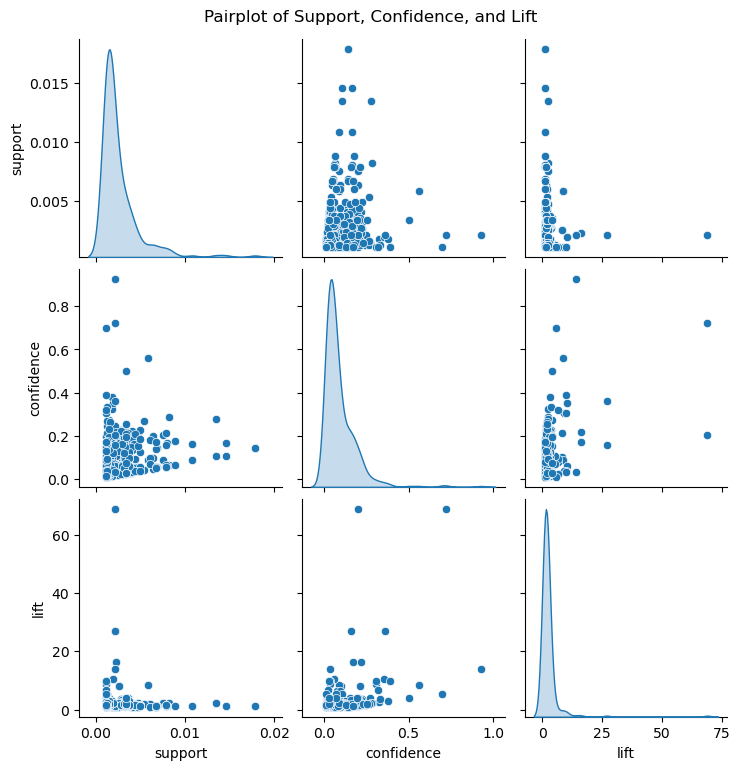

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pairplot for Support, Confidence, and Lift
sns.pairplot(rules[['support', 'confidence', 'lift']], diag_kind='kde')
plt.suptitle('Pairplot of Support, Confidence, and Lift', y=1.02)
plt.show()

By applying Association Rule Learning to grocery sales data, supermarkets can uncover valuable patterns in customer purchasing behavior. This allows them to identify which products are frequently bought together, enabling the design of effective cross-promotion strategies and optimizing store layouts. Data-driven insights into buying habits help supermarkets create personalized marketing offers, such as targeted discounts or bundling products, improving customer satisfaction and sales. Additionally, the store can use these insights to manage stock more efficiently, ensuring popular items are always available while minimizing overstock of less-demanded products. Overall, this approach maximizes resource allocation, enhances customer experience, and increases revenue by driving repeat purchases.